### 1. Polynomial Regression Analysis

### 1-1.

In [1]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt(fname="quiz5-1.txt", dtype=float)
x_data = data[:,0]
y_data = data[:,1]

print(x_data, y_data, sep="\n")

[0.   0.05 0.15 0.12 0.1  0.34 0.45 1.02 0.31 1.39 1.15 1.35 1.4 ]
[0.   0.52 1.56 1.69 0.65 2.33 2.32 3.24 2.46 1.69 3.37 2.59 1.81]


In [2]:
# use np.polyfit

from numpy import polyfit, poly1d

coeff_1 = polyfit(x_data, y_data, deg=1)
coeff_2 = polyfit(x_data, y_data, deg=2)
coeff_4 = polyfit(x_data, y_data, deg=4)

deg_1 = poly1d(coeff_1)
deg_2 = poly1d(coeff_2)
deg_4 = poly1d(coeff_4)


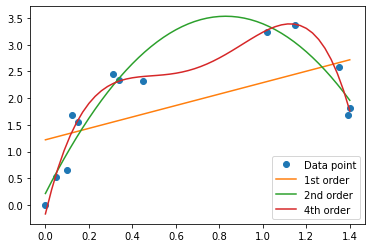

In [3]:
import matplotlib.pyplot as plt

x_plot = np.linspace(min(x_data), max(x_data))
y_1 = deg_1(x_plot)
y_2 = deg_2(x_plot)
y_4 = deg_4(x_plot)

plt.plot(x_data, y_data, 'o', label="Data point")
plt.plot(x_plot, y_1, label="1st order")
plt.plot(x_plot, y_2, label="2nd order")
plt.plot(x_plot, y_4, label="4th order")
plt.legend()
plt.show()


### 1-2.

In [4]:
# measure the residual for each polynomial

from numpy import ndarray

def calc_residual(x_data : ndarray, y_data : ndarray, Poly : poly1d) : 
    y_poly = Poly(x_data)
    y_poly = y_data - y_poly
    return (y_poly.T @ y_poly) / len(y_poly)

R_1 = calc_residual(x_data=x_data, y_data=y_data, Poly=deg_1)
R_2 = calc_residual(x_data=x_data, y_data=y_data, Poly=deg_2)
R_4 = calc_residual(x_data=x_data, y_data=y_data, Poly=deg_4)

print("R_1 : ", R_1)
print("R_2 : ", R_2)
print("R_4 : ", R_4)
print("Since R_4 is least, 4th degree of polynomial is best fitting")
print("Note R is not a coefficient of determination.")
print("It's just average residual for each data.")


R_1 :  0.6154195640612089
R_2 :  0.09770221384232317
R_4 :  0.04191135876994826
Since R_4 is least, 4th degree of polynomial is best fitting
Note R is not a coefficient of determination.
It's just average residual for each data.


### 1-3.

In [5]:
# x_data : time
# y_data : height (y)

# y = ax**2 + bx + c
print("Note that v0 and g will be driven via 2nd order polynomial")
print("Coefficients : ", coeff_2, end="\n\n")
print("Initial position y0 : ", coeff_2[2])
print("Initial velocity v0 : ", coeff_2[1])
print("Gravitational acceleration g : ", coeff_2[0] * -2)


Note that v0 and g will be driven via 2nd order polynomial
Coefficients :  [-4.8276441   8.00422541  0.21463893]

Initial position y0 :  0.21463892780721372
Initial velocity v0 :  8.004225414969124
Gravitational acceleration g :  9.65528820894312


### 2. Curvefit Regression Analysis

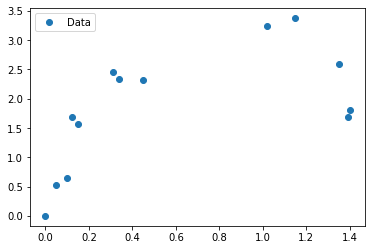

In [6]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt(fname="quiz5-1.txt", dtype=float)
x_data = data[:,0]
y_data = data[:,1]

import matplotlib.pyplot as plt

plt.plot(x_data, y_data, 'o', label="Data")
plt.legend()
plt.show()


Coef :  [-5.30840843  8.7998192 ]
Initial velocity v0 :  8.79981920105293
Gravitational acceleration :  10.616816858595023


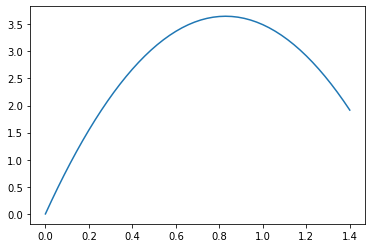

In [7]:
# use scipy.optimize.curve_fit

from scipy.optimize import curve_fit

def calc_height(x_data : np.ndarray, a, b) : 
    return a * x_data**2 + b * x_data

coef, pcov = curve_fit(f=calc_height, xdata=x_data, ydata=y_data)
print("Coef : ", coef)
print("Initial velocity v0 : ", coef[1])
print("Gravitational acceleration : ", coef[0] * -2)

import matplotlib.pyplot as plt

x = np.linspace(min(x_data), max(x_data))
y = calc_height(x, coef[0], coef[1])

plt.plot(x, y)
plt.show()


### 3. Complex Cruvefit Regression Analysis

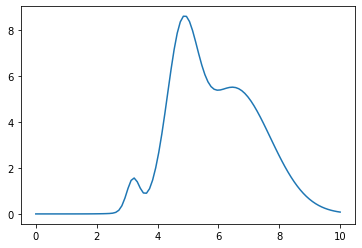

In [8]:
import numpy as np
import matplotlib.pyplot as plt 
from numpy import genfromtxt

data = genfromtxt(fname="quiz5-3.txt", dtype=float)
x_data = data[:,0]
y_data = data[:,1]

plt.plot(x_data, y_data)
plt.show()


In [9]:
from scipy.optimize import curve_fit

def func(x_input, a1, b1, c1, a2, b2, c2, a3, b3, c3) : 
    first = a1 * np.exp(-1 * ((x_input - b1) / (c1))**2)
    second = a2 * np.exp(-1 * ((x_input - b2) / (c2))**2)
    third = a3 * np.exp(-1 * ((x_input - b3) / (c3))**2)
    return first + second + third

coef, pcov = curve_fit(f=func, xdata=x_data, ydata=y_data)
for i, term in zip([0, 3, 6], ["First", "Second", "Third"]) : 
    print(term)
    print("a : ", coef[i])
    print("b : ", coef[i + 1])
    print("c : ", coef[i + 2])
    print()


First
a :  5.5
b :  6.5
c :  1.7

Second
a :  6.5
b :  4.8
c :  0.6999999999999998

Third
a :  1.4
b :  3.2
c :  0.3



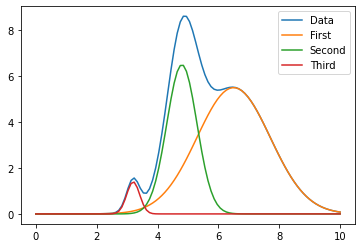

In [10]:
import matplotlib.pyplot as plt

def calc_gaussian(x_input, coef) : 
    return coef[0] * np.exp(-1 * ((x_input - coef[1]) / (coef[2]))**2)

x_plot = np.linspace(min(x_data), max(x_data), 100)
y_first = calc_gaussian(x_plot, coef=coef[0:3])
y_second = calc_gaussian(x_plot, coef=coef[3:6])
y_third = calc_gaussian(x_plot, coef=coef[6:9])

plt.plot(x_data, y_data, label="Data")
plt.plot(x_plot, y_first, label="First")
plt.plot(x_plot, y_second, label="Second")
plt.plot(x_plot, y_third, label="Third")
plt.legend()
plt.show()


### 4. Find the local minimum and roots

### since problem 4-1 has global minimum with negative infinite, we'll only search where $f''(x)$ is positive.

#### define functions

In [11]:
# define Bisection method 

def Bisection(func, x_init, x_end, tol=1.0e-9, max_iter=100) : 
    from time import time
    from math import sqrt

    iter = 1
    root = None
    init_time = time()
    compute_time = None

    y_init = func(x_init)
    y_end = func(x_end)
    
    if y_init * y_end > 0 : 
        print("x_init and x_end are wrong. \
              They has to be signed (+,-) or (-, +)")
        return None, None, time() - init_time
    
    while True : 
        x_mid = (x_init + x_end) / 2
        y_mid = func(x_mid)

        if sqrt(y_mid**2) <= tol : 
            root = x_mid
            compute_time = time() - init_time
            break
        
        elif iter >= max_iter : 
            print("Failed to converge.")
            return None, None, time() - init_time
        
        if y_init * y_mid > 0 : 
            x_init = x_mid
        else : 
            x_end = x_mid
        iter += 1

    return root, iter, compute_time


In [12]:
# define Newton-Raphson method

def Newton_Raphson(f0, f1, x_init, tol=1.0e-9, max_iter=100) : 
    from time import time
    from math import sqrt

    iter = 1
    root = None
    init_time = time()
    compute_time = None

    # y = ax + b
    # a = f1(x)
    # b = (point_y) - a * (point_x)
    # x_intercept = -b / a
    while True : 
        point_x, point_y = x_init, f0(x_init)
        a = f1(x_init)
        b = point_y - a * point_x

        x_intercept = -b / a
        y = f0(x_intercept)

        if sqrt(y * y) < tol : 
            root = x_intercept
            compute_time = time() - init_time
            break

        elif iter >= max_iter : 
            print("Failed to converge.")
            return None, None, time() - init_time
        
        x_init = x_intercept
        iter += 1

    return root, iter, compute_time


### 4-1.

Root for problem is in :  [[1.5306122448979593, 1.7346938775510203]]
[1.5306122448979593, 1.7346938775510203]


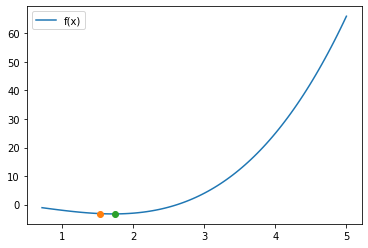

In [13]:
# define search range

import numpy as np
import matplotlib.pyplot as plt

def f0(x) : 
    return x**3 - 2 * x**2 - 2 * x + 1

def f1(x) : 
    return 3 * x**2 - 4 * x - 2

def f2(x) : 
    return 6 * x - 4

search_range  = np.linspace(-5, 5)

search_range = search_range[np.where(f2(search_range) > 0)]

x_interval = []
for i in range(len(search_range) - 1) : 
    x_init = search_range[i]
    x_end = search_range[i + 1]
    if f1(x_init) * f1(x_end) < 0 : 
        x_interval.append([x_init, x_end])

print("Root for problem is in : ", x_interval)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
for interval in x_interval : 
    print(interval)
    plt.plot(interval[0], f0(interval[0]), 'o')
    plt.plot(interval[1], f0(interval[1]), 'o')
plt.legend()
plt.show()


Solution via Bisection :  [1.7207585548867985]
	--> f(x) :  -3.2683538223455493
	--> f'(x) :  -4.206898883474253e-06
Iteration via Bisection :  [16]
Time via Bisection :  [2.9325485229492188e-05]


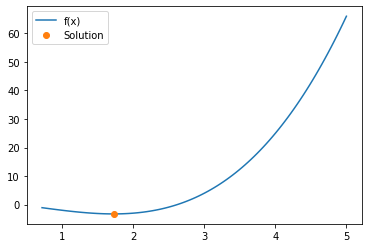

In [14]:
# solution via Bisection

Root_bisect = []
Iter_bisect = []
Duration_bisect = []
for interval in  x_interval : 
    x_init = interval[0]
    x_end = interval[1]
    result = Bisection(func=f1, x_init=x_init, x_end=x_end, tol=1.0e-5)
    Root_bisect.append(result[0])
    Iter_bisect.append(result[1])
    Duration_bisect.append(result[2])

print("Solution via Bisection : ", Root_bisect)
print("\t--> f(x) : ", f0(*Root_bisect))
print("\t--> f'(x) : ", f1(*Root_bisect))
print("Iteration via Bisection : ", Iter_bisect)
print("Time via Bisection : ", Duration_bisect)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
plt.plot(Root_bisect, f0(*Root_bisect), 'o', label="Solution")
plt.legend()
plt.show()


Solution via Newton-Raphson :  [1.720759220083733]
	--> f(x) :  -3.2683538223469473
	--> f'(x) :  1.7459900192307032e-10
Iteration via Newton-Raphson :  [3]
Time via Newton-Raphson :  [1.1920928955078125e-05]


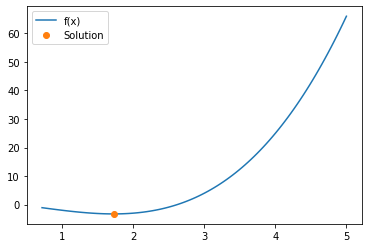

In [15]:
# solution via Newton-Raphson

Root_newton = []
Iter_newton = []
Duration_newton = []
for interval in  x_interval : 
    x_init = (interval[0] + interval[1]) / 2
    result = Newton_Raphson(f0=f1, f1=f2, x_init=x_init, tol=1.0e-5)
    Root_newton.append(result[0])
    Iter_newton.append(result[1])
    Duration_newton.append(result[2])

print("Solution via Newton-Raphson : ", Root_newton)
print("\t--> f(x) : ", f0(*Root_newton))
print("\t--> f'(x) : ", f1(*Root_newton))
print("Iteration via Newton-Raphson : ", Iter_newton)
print("Time via Newton-Raphson : ", Duration_newton)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
plt.plot(Root_newton, f0(*Root_newton), 'o', label="Solution")
plt.legend()
plt.show()


Which one is faster?
--> Newton : [1.7404556274414062e-05]s faster


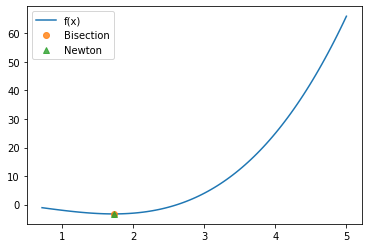

In [16]:
# compare both method

import numpy as np
import matplotlib.pyplot as plt

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")

for root_bisect, root_newton in zip(Root_bisect, Root_newton) : 
    plt.plot(
        root_bisect, f0(root_bisect), 
        'o', label="Bisection", alpha=0.8
    )
    plt.plot(
        root_newton, f0(root_newton), 
        '^', label="Newton", alpha=0.8
    )

print("Which one is faster?")
for dur_bisect, dur_newton in zip(Duration_bisect, Duration_newton) : 
    comp_time = abs(dur_bisect - dur_newton)

    if dur_bisect < dur_newton : 
        print("--> Bisection : [{}]s faster".format(comp_time))
    else : 
        print("--> Newton : [{}]s faster".format(comp_time))

plt.legend()
plt.show()


### 4-2.

Root for problem is in :  [[0.30612244897959184, 0.40816326530612246]]
[0.30612244897959184, 0.40816326530612246]


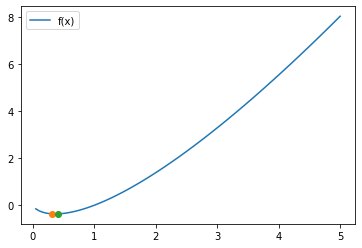

In [17]:
# define search range

import numpy as np
import matplotlib.pyplot as plt

# ignore warning message divide by zero , invalid value encountered
np.seterr(divide='ignore', invalid='ignore')

def f0(x) : 
    return x * np.log(x)

def f1(x) : 
    return np.log(x) + 1

def f2(x) : 
    return 1 / x

search_range  = np.linspace(0, 5)

search_range = search_range[np.where(f2(search_range) > 0)]

# print(search_range)
x_interval = []
for i in range(len(search_range) - 1) : 
    x_init = search_range[i]
    x_end = search_range[i + 1]
    if f1(x_init) * f1(x_end) < 0 : 
        x_interval.append([x_init, x_end])

print("Root for problem is in : ", x_interval)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
for interval in x_interval : 
    print(interval)
    plt.plot(interval[0], f0(interval[0]), 'o')
    plt.plot(interval[1], f0(interval[1]), 'o')
plt.legend()
plt.show()


Solution via Bisection :  [0.3678800621811225]
	--> f(x) :  -0.3678794411709182
	--> f'(x) :  1.688077904127283e-06
Iteration via Bisection :  [12]
Time via Bisection :  [4.7206878662109375e-05]


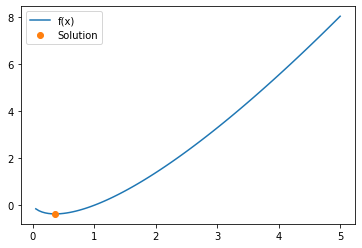

In [18]:
# solution via Bisection

Root_bisect = []
Iter_bisect = []
Duration_bisect = []
for interval in  x_interval : 
    x_init = interval[0]
    x_end = interval[1]
    result = Bisection(func=f1, x_init=x_init, x_end=x_end, tol=1.0e-5)
    Root_bisect.append(result[0])
    Iter_bisect.append(result[1])
    Duration_bisect.append(result[2])

print("Solution via Bisection : ", Root_bisect)
print("\t--> f(x) : ", f0(*Root_bisect))
print("\t--> f'(x) : ", f1(*Root_bisect))
print("Iteration via Bisection : ", Iter_bisect)
print("Time via Bisection : ", Duration_bisect)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
plt.plot(Root_bisect, f0(*Root_bisect), 'o', label="Solution")
plt.legend()
plt.show()


Solution via Newton-Raphson :  [0.367879407142094]
	--> f(x) :  -0.3678794411714407
	--> f'(x) :  -9.250136345784199e-08
Iteration via Newton-Raphson :  [2]
Time via Newton-Raphson :  [3.0040740966796875e-05]


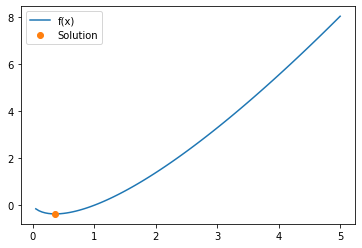

In [19]:
# solution via Newton-Raphson

Root_newton = []
Iter_newton = []
Duration_newton = []
for interval in  x_interval : 
    x_init = (interval[0] + interval[1]) / 2
    result = Newton_Raphson(f0=f1, f1=f2, x_init=x_init, tol=1.0e-5)
    Root_newton.append(result[0])
    Iter_newton.append(result[1])
    Duration_newton.append(result[2])

print("Solution via Newton-Raphson : ", Root_newton)
print("\t--> f(x) : ", f0(*Root_newton))
print("\t--> f'(x) : ", f1(*Root_newton))
print("Iteration via Newton-Raphson : ", Iter_newton)
print("Time via Newton-Raphson : ", Duration_newton)

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")
plt.plot(Root_newton, f0(*Root_newton), 'o', label="Solution")
plt.legend()
plt.show()


Which one is faster?
--> Newton : [1.71661376953125e-05]s faster


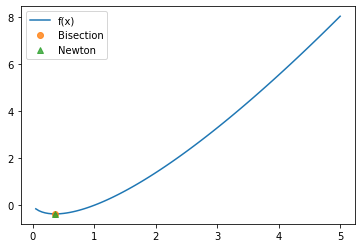

In [20]:
# compare both method

import numpy as np
import matplotlib.pyplot as plt

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")

for root_bisect, root_newton in zip(Root_bisect, Root_newton) : 
    plt.plot(
        root_bisect, f0(root_bisect), 
        'o', label="Bisection", alpha=0.8
    )
    plt.plot(
        root_newton, f0(root_newton), 
        '^', label="Newton", alpha=0.8
    )

print("Which one is faster?")
for dur_bisect, dur_newton in zip(Duration_bisect, Duration_newton) : 
    comp_time = abs(dur_bisect - dur_newton)

    if dur_bisect < dur_newton : 
        print("--> Bisection : [{}]s faster".format(comp_time))
    else : 
        print("--> Newton : [{}]s faster".format(comp_time))

plt.legend()
plt.show()


### 5. Find the roots of Riemann zeta function

### 5-1.

Root for problem is in : 
[-10.183673469387756, -9.979591836734693]
[-8.142857142857142, -7.938775510204081]
[-6.1020408163265305, -5.8979591836734695]
[-4.061224489795919, -3.8571428571428568]
[-2.020408163265305, -1.816326530612244]


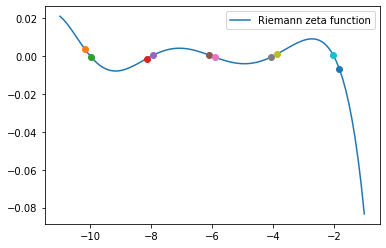

In [21]:
# define search range

import numpy as np
import matplotlib.pyplot as plt

from scipy.special import zeta

def f0(x) : 
    return zeta(x=x)

search_range  = np.linspace(-11, -1)

x_interval = []
for i in range(len(search_range) - 1) : 
    x_init = search_range[i]
    x_end = search_range[i + 1]
    if f0(x_init) * f0(x_end) < 0 : 
        x_interval.append([x_init, x_end])

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = zeta(x_plot)

plt.plot(x_plot, y_plot, label="Riemann zeta function")

print("Root for problem is in : ")
for interval in x_interval : 
    print(interval)
    plt.plot(interval[0], zeta(interval[0]), 'o')
    plt.plot(interval[1], zeta(interval[1]), 'o')
plt.legend()
plt.show()


Solution via Bisection : 
--> [-10.0000000]   | f(x) : [-0.0000000004]    | Iter : [21]  | Time : [0.0000870228] sec
--> [-8.0000000]    | f(x) : [-0.0000000003]    | Iter : [20]  | Time : [0.0000398159] sec
--> [-6.0000000]    | f(x) : [0.0000000000]     | Iter : [1]   | Time : [0.0000050068] sec
--> [-4.0000000]    | f(x) : [0.0000000003]     | Iter : [20]  | Time : [0.0000460148] sec
--> [-2.0000000]    | f(x) : [0.0000000006]     | Iter : [21]  | Time : [0.0000419617] sec


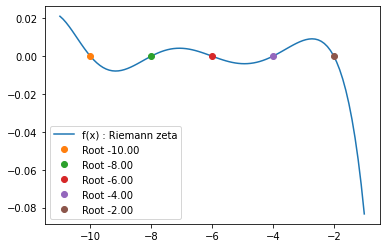

In [22]:
# use Bisection method

Root_bisect = []
Iter_bisect = []
Duration_bisect = []
for interval in  x_interval : 
    x_init = interval[0]
    x_end = interval[1]
    result = Bisection(func=f0, x_init=x_init, x_end=x_end)
    Root_bisect.append(result[0])
    Iter_bisect.append(result[1])
    Duration_bisect.append(result[2])

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x) : Riemann zeta")

print("Solution via Bisection : ")
for root, iter, time in zip(Root_bisect, Iter_bisect, Duration_bisect) : 
    print("--> [{:.7f}] ".format(root).ljust(20), end="")
    print("| f(x) : [{:.10f}] ".format(f0(root)).ljust(28), end="")
    print("| Iter : [{}]".format(iter).ljust(15), end="")
    print("| Time : [{:.10f}] sec".format(time).ljust(20))
    plt.plot(root, f0(root), 'o', label="Root {:.2f}".format(root))

plt.legend()
plt.show()


### 5-2.

Root for problem is in : 
[1.9183673469387754, 2.1020408163265305]


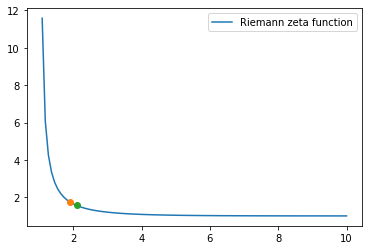

In [23]:
# define search range

import numpy as np
import matplotlib.pyplot as plt

from scipy.special import zeta

def f0(x) : 
    return zeta(x=x) - (np.pi**2) / 6

search_range  = np.linspace(1, 10)

x_interval = []
for i in range(len(search_range) - 1) : 
    x_init = search_range[i]
    x_end = search_range[i + 1]
    if f0(x_init) * f0(x_end) < 0 : 
        x_interval.append([x_init, x_end])

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = zeta(x_plot)

plt.plot(x_plot, y_plot, label="Riemann zeta function")

print("Root for problem is in : ")
for interval in x_interval : 
    print(interval)
    plt.plot(interval[0], zeta(interval[0]), 'o')
    plt.plot(interval[1], zeta(interval[1]), 'o')
plt.legend()
plt.show()


f(x) = (Riemann zeta) - (pi**2) / 6
Solution via Bisection : 
--> [2.0000000]     | f(x) : [-0.0000000006]    | Iter : [25]  | Time : [0.0000870228] sec


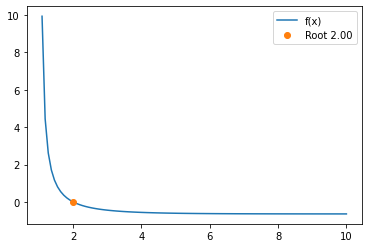

In [24]:
# use Bisection method

Root_bisect = []
Iter_bisect = []
Duration_bisect = []
for interval in  x_interval : 
    x_init = interval[0]
    x_end = interval[1]
    result = Bisection(func=f0, x_init=x_init, x_end=x_end)
    Root_bisect.append(result[0])
    Iter_bisect.append(result[1])
    Duration_bisect.append(result[2])

x_plot = np.linspace(min(search_range), max(search_range), 100)
y_plot = f0(x_plot)

plt.plot(x_plot, y_plot, label="f(x)")

print("f(x) = (Riemann zeta) - (pi**2) / 6")
print("Solution via Bisection : ")
for root, iter, time in zip(Root_bisect, Iter_bisect, Duration_bisect) : 
    print("--> [{:.7f}] ".format(root).ljust(20), end="")
    print("| f(x) : [{:.10f}] ".format(f0(root)).ljust(28), end="")
    print("| Iter : [{}]".format(iter).ljust(15), end="")
    print("| Time : [{:.10f}] sec".format(time).ljust(20))
    plt.plot(root, f0(root), 'o', label="Root {:.2f}".format(root))

plt.legend()
plt.show()


### 6.

### 1. Simplify the problem

##### problem say,
##### $$ x_{(v_{0}, \theta, t)} = \frac{v_{0x}}{\gamma}(1 - e^{-\gamma t}) $$
##### $$ y_{(v_{0}, \theta, t)} = (\frac{v_{0y}}{\gamma} + \frac{g}{\gamma^{2}})(1 - e^{-\gamma t}) - \frac{g}{\gamma}t$$

$$ g = 9.81m/s^{2}, \ \gamma = 0.01s^{-1}  $$ 

##### and find $ v_{0}, \theta, t $ where projectile reaches point $ A (x = 300, y = 61)$ with $ 45\deg $.

##### problem provide the condition $ \frac{\partial x}{\partial t} = -\frac{\partial y}{\partial t} $ since at point A, projectile is $45\deg$

##### also we already know $ v_{0x} = v_{0}\cos\theta, v_{0y} = v_{0}\sin\theta $

##### eventually we have to solve the problem where,

##### $$ f_{1(v_{0}, \theta, t)} = x_{(v_{0}, \theta, t)} - 300 = 0 $$
##### $$ f_{2(v_{0}, \theta, t)} = y_{(v_{0}, \theta, t)} - 61 = 0 $$
##### $$ f_{3(v_{0}, \theta, t)} = \frac{\partial x_{(v_{0}, \theta, t)}}{\partial t} + \frac{\partial y_{(v_{0}, \theta, t)}}{\partial t} = 0 $$

### 2. Define functions to solve problems

##### applying $g = 9.81m/s^{2}, \gamma = 0.01s^{-1}, v_{0x} = v_{0}\cos\theta, v_{0y} = v_{0}\sin\theta $ to $x, y, f$, 
##### they becomes

#### $$ x_{(v_{0}, \theta, t)} = \frac{v_{0}\cos\theta}{0.01}(1 - e^{-0.01t}) = 100v_{0}\cos\theta(1 - e^{-0.01t}) $$

#### $$ y_{(v_{0}, \theta, t)} = (\frac{v_{0}\sin\theta}{0.01} + \frac{9.81}{(0.01)^{2}})(1 - e^{-0.01t}) - \frac{9.81}{0.01}t $$

#### $$ = (100v_{0}\sin\theta + \frac{9.81}{(0.01)^2})(1 - e^{-0.01t}) - 981t $$

#### $$ \frac{\partial x}{\partial t} = v_{0} \cos\theta e^{-0.01t} $$

#### $$ \frac{\partial y}{\partial t} = (v_{0}\sin\theta + 981)e^{-0.01t} - 981 $$


#### Eventually,
#### $$ f_{1(v_{0}, \theta, t)} = 100v_{0}\cos\theta(1 - e^{-0.01t}) - 300 = 0 $$
#### $$ f_{2(v_{0}, \theta, t)} = (100v_{0}\sin\theta + \frac{9.81}{(0.01)^2})(1 - e^{-0.01t}) - 981t - 61 = 0 $$
#### $$ f_{3(v_{0}, \theta, t)} = v_{0} \cos\theta e^{-0.01t} + (v_{0}\sin\theta + 981)e^{-0.01t} - 981 = 0 $$

##### Now we can use Newton-Raphson method

### 3. Solve problem

In [25]:
# define Newton-Rapshon method
# use np.linalg.solve 

import numpy as np
from time import time

def NewtonRaphson(
        func : list, x_init=None, 
        increment=1.0e-4, tol=1.0e-9, max_iter=100
) : 
    import numpy as np
    from math import sqrt
    from time import time

    n = len(func)
    if x_init is None : 
        x_init = np.zeros((n), dtype=float).flatten()
        for i in range(n) : 
            x_init[i] = 1
    elif len(x_init) != n : 
        print("x_init must be same dimensions with func")
        return None, None, None
    elif type(x_init) == type(list()) : 
        x_init = np.array(x_init, dtype=float)
    else : 
        x_init = x_init.astype(dtype=float)

    iter = 0
    compute_time = time()
    while True : 
        Jacobian = np.zeros((n,n), dtype=float)
        f_x = np.zeros(x_init.shape, dtype=float)

        for i in range(n) : 
            fi = func[i]

            for j in range(n) : 
                step = np.zeros(x_init.shape, dtype=float)
                step[j] = increment
                Jacobian[i, j] = (
                    fi(*(x_init + step)) - fi(*x_init)
                ) / increment
            
            f_x[i] = -1 * fi(*x_init)

        if sqrt(abs(max(f_x) * max(f_x))) <= tol : 
            compute_time = time() - compute_time
            break

        del_x = np.linalg.solve(Jacobian, f_x)

        if sqrt(abs(del_x.T @ del_x)) <= tol : 
            compute_time = time() - compute_time
            break
        else : 
            x_init += del_x
        
        if iter >= max_iter : 
            print("Failed to converge.")
            return None, iter, time() - compute_time
        
        iter += 1

    return x_init, iter, compute_time

In [26]:
# define functions

import numpy as np
from numpy import cos, sin, exp

def f1(v0, theta, t) : 
    return 100 * v0 * cos(theta) * (1 - exp(-0.01 * t)) - 300

def f2(v0, theta, t) : 
    return (100 * v0 * sin(theta) + 9.81 / (0.01**2)) \
        * (1 - exp(-0.01 * t)) - 981 * t - 61

def f3(v0, theta, t) : 
    return v0 * cos(theta) * exp(-0.01 * t) \
        + (v0 * sin(theta) + 981) * exp(-0.01 * t) - 981


##### In our previous class, we've solve the problem in case which there's no airdrag.
##### So we can assume our solution will be close enough to converge, when initial $(v_{0}, \theta, t)$ is a solution for no airdrag case
##### In no airdrag case, solution was $ v_{0} = 60, \ \theta = 54\deg,\ t = 8s $.

In [27]:
# solve problem

solution, iter, compute_time = NewtonRaphson(
    func=[f1, f2, f3], max_iter=10000, x_init=[60, 54 * np.pi / 180, 8]
)

print("Iteration : ", iter)
print("Compute time : ", comp_time, end="\n\n")

print("v0 : ", solution[0])
print("theta (degree) : ", (solution[1] * 180 / np.pi) % 360)
print("time : ", solution[2])


Iteration :  3
Compute time :  1.71661376953125e-05

v0 :  61.868661764823806
theta (degree) :  53.28131809236353
time :  8.458019157908735


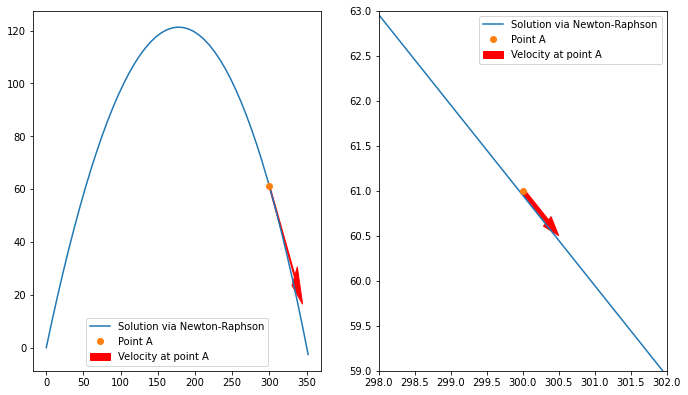

In [28]:
import matplotlib.pyplot as plt

zoom = 2

v0 = solution[0]
theta = solution[1]
t = solution[2]

v_x = v0 * cos(theta) * exp(-0.01 * t)
v_y = (v0 * sin(theta) + 981) * exp(-0.01 * t) - 981

t = np.linspace(0, 10)
x = f1(v0=v0, theta=theta, t=t) + 300
y = f2(v0=v0, theta=theta, t=t) + 61

fig = plt.figure(figsize=(4, 5))
ax_1 = fig.add_axes([0, 0, 1, 1])
ax_2 = fig.add_axes([1.2, 0, 1, 1])
ax_list = [ax_1, ax_2]

ax_1.arrow(
    300, 61, v_x, v_y, width=1, 
    color='r', label="Velocity at point A", head_width=10
)

for axes in ax_list : 
    axes.plot(x, y, label="Solution via Newton-Raphson")
    axes.plot(300, 61, 'o', label="Point A")
    axes.legend()

ax_2.set_xlim(300 - zoom, 300 + zoom)
ax_2.set_ylim(61 - zoom, 61 + zoom)
ax_2.arrow(
    300, 61, (v_x)/100, (v_y)/100, 
    width=0.05, label="Velocity at point A", color='r'
)
ax_2.legend()
plt.show()
